In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Lokanathswami\Desktop\Zero To Hero\Datasets\processed.cleveland.data",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [6]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df.shape

(303, 14)

In [8]:
#Datatype of each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [9]:
# checking object type columns
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [11]:
# Dealing with Missing Data
# Decision Tree algorithm dosnot support missing data
df[df.ca=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
len(df[df.ca=='?'])

4

In [13]:
df[df.thal=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [14]:
len(df[df.thal=='?'])

2

In [15]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [16]:
# Actually dataset contains missing value in the form of '?'
#Hence there is need to check each object datype columns lebels

In [17]:
df[(df.ca=='?')|(df.thal=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [18]:
len(df[(df.ca=='?')|(df.thal=='?')]),len(df)

(6, 303)

In [19]:
print('Missing value % = :',6*100/303)


Missing value % = : 1.9801980198019802


In [20]:
df.loc[(df.ca!='?') & (df.thal!='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [21]:
df2=df.loc[(df.ca!='?') & (df.thal!='?')]
df2.shape

(297, 14)

In [22]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [23]:
# Making X and Y datasets
X=df2.drop('hd',axis=1)
Y=df2['hd']

In [24]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [25]:
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [26]:
X.shape,Y.shape

((297, 13), (297,))

In [27]:
#Displaying all the unique lebels in each feature
for column in df2:
    lebels=np.unique(df2[column])
    no_of_lebels=len(lebels)
    if no_of_lebels<10:
        print('The No of Lebels in feature {} : {}----{}'.format(column,no_of_lebels,lebels))
    else:
        print('The No of Lebels in feature {} : {}'.format(column,no_of_lebels))

The No of Lebels in feature age : 41
The No of Lebels in feature sex : 2----[0. 1.]
The No of Lebels in feature cp : 4----[1. 2. 3. 4.]
The No of Lebels in feature restbp : 50
The No of Lebels in feature chol : 152
The No of Lebels in feature fbs : 2----[0. 1.]
The No of Lebels in feature restecg : 3----[0. 1. 2.]
The No of Lebels in feature thalach : 91
The No of Lebels in feature exang : 2----[0. 1.]
The No of Lebels in feature oldpeak : 40
The No of Lebels in feature slope : 3----[1. 2. 3.]
The No of Lebels in feature ca : 4----['0.0' '1.0' '2.0' '3.0']
The No of Lebels in feature thal : 3----['3.0' '6.0' '7.0']
The No of Lebels in feature hd : 5----[0 1 2 3 4]


In [28]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [29]:
Y.unique() #unique is attribute and also function

array([0, 2, 1, 3, 4], dtype=int64)

In [30]:
# Making only two categories instead of 5 ccategory. 0 No heart disease  and 1  Heart diease 
Y_graterthanzero=Y>0 #Getting all indexes of values greater than zero
Y[Y_graterthanzero]=1 #assigning Y grater than zero as 1

C:\Users\Lokanathswami\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lokanathswami\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
Y.unique()

array([0, 1], dtype=int64)

In [32]:
Y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64

In [33]:
# Splitting Datasets in Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier(random_state=42)
DTclf=DTclf.fit(x_train,y_train)  # Training the model

[Text(479.8318965517241, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(277.79741379310343, 356.73749999999995, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(169.5646551724138, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(122.66379310344828, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(72.15517241379311, 254.81249999999997, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(43.293103448275865, 220.83749999999998, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(28.862068965517242, 186.86249999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(14.431034482758621, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(43.293103448275865, 152.8875, 'exang <= 0.5\ngini = 0.

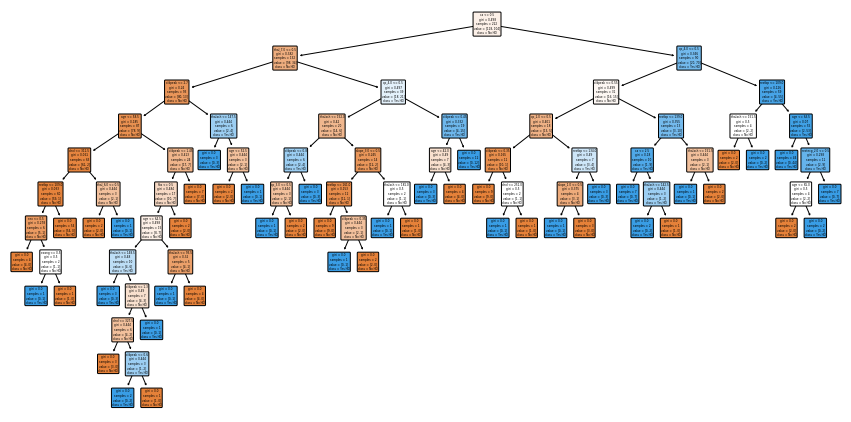

In [35]:
from sklearn import tree
plt.figure(figsize=(15,7.5))
tree.plot_tree(DTclf,filled=True,class_names=['No HD','Yes HD'],feature_names=X_encoded.columns,rounded=True)

    

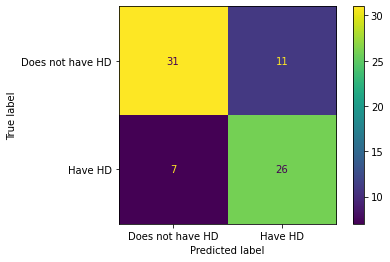

In [36]:
#plotting Confusion Matrix for test dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DTclf, x_test, y_test,display_labels=['Does not have HD','Have HD'])

In [37]:
# Cost complexity pruning part-1
path=DTclf.cost_complexity_pruning_path(x_train,y_train) # Determine values for alpha
ccp_alphas=path.ccp_alphas # Extract diffrent values for alpha. ccp means cost complexity prunig
ccp_alphas=ccp_alphas[:-1] # Exclude the maximum value for alpha

DTclfs=[] # Create an array that we will put decision trees into

# Now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    DTclf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    DTclf.fit(x_train,y_train)
    DTclfs.append(DTclf)
    

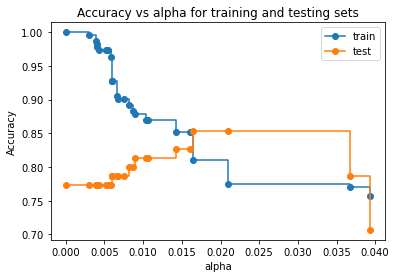

In [38]:
# Let's graph the  accracy of the trees using the training dataset and testing dataset as a function of alpha
train_scores=[DTclf.score(x_train,y_train) for DTclf in  DTclfs]
test_scores=[DTclf.score(x_test,y_test) for DTclf in  DTclfs]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

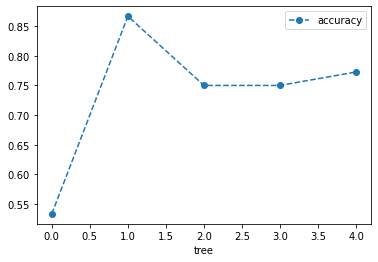

In [39]:
DTclf = DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)# Create a tree with ccp_alpha=0.016
#Now we use 5-fold cross validation which creates 5 diffrent training and testing datsets that are used to train & test the tree.
# we use 5-fold beacuse we dont have ton of data...
from sklearn.model_selection import cross_val_score 
scores=cross_val_score(DTclf,x_train,y_train,cv=5)
dff=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
dff.plot(x='tree',y='accuracy',marker='o',linestyle='--')


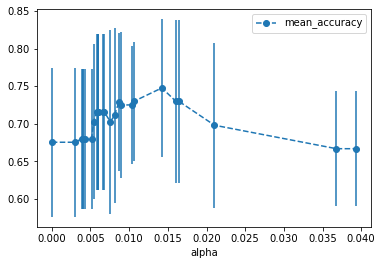

In [40]:
# Create an array to store the results of each fold during cross validation
alpha_loop_values=[]
#for each candidate value for alpha,we will run 5-fold cross validation
#Then we will store the mean and standard deviation of the score (accuracy) for each call

for ccp_alpha in ccp_alphas:
    DTclf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(DTclf,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
#Now we can draw a graph of means and standard deviations of the scores for each candidate value for alpha
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [41]:
#Using cross validation we can see that over all,instead of setting ccp_alph=0.016,we need to set it to about 0.014.
#we can find exact value between 0.014 and 0.015
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [42]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [43]:
# Converting series to float
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [44]:
# Build & Train a new decision tree,only this time use the optimal value for alpha
DTclf_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
DTclf_pruned=DTclf_pruned.fit(x_train,y_train)

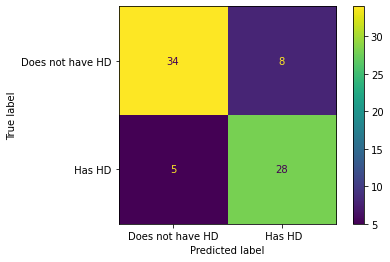

In [45]:
#Confusion Matrix to see if the pruned tree does better
plot_confusion_matrix(DTclf_pruned,x_test,y_test,display_labels=['Does not have HD',' Has HD'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes H

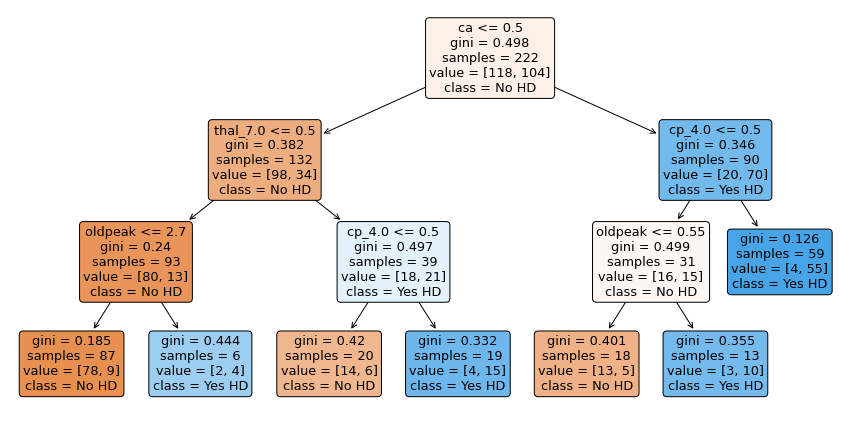

In [46]:
#Draw the pruned tree is better at classifying patients than the full sized tree
from sklearn import tree
plt.figure(figsize=(15,7.5))
tree.plot_tree(DTclf_pruned,filled=True,class_names=['No HD','Yes HD'],feature_names=X_encoded.columns,rounded=True)
